-1.8584470933815633
(32, 1)
(32, 1)


/var/folders/ng/t88_wbjj3k7cyly_9zq81y9c0000gn/T/ipykernel_57828/1985247480.py:22: RuntimeWarning: invalid value encountered in log
  lnp    = np.log(p)


(32000, 1)
[-1.54783565]
[2.69936348]
[1.98935613]
[-1.38298651]
[-0.92141911]


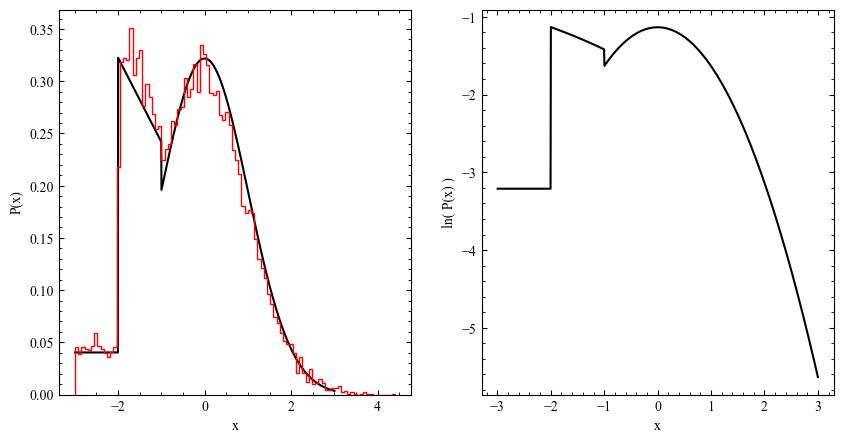

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee

# sample a multi-dimensonal Gaussian 
def prob(x, mu, sig): 
    if x - mu > - sig: 
       diff = x - mu
       p = 1/np.sqrt(2*np.pi*sig**2)*np.exp(-0.5*diff**2/sig**2)
       return p/1.24 # 1.24 = 0.05 + 0.35 + 0.84
    if - 2*sig < x - mu < - sig:
       p = 0.2 - 0.1*x
       return p/1.24
    if - 3*sig < x - mu < - 2*sig: 
       p = 0.05
       return p/1.24
    return -np.inf 
 

def lnprob(x, mu, sig): # emcee actually requires the logarithm of p
    p      = prob(x, mu, sig)
    lnp    = np.log(p)
    if(p == -np.inf): lnp = - np.inf
    return lnp 

#def prob(theta, m):
#    if  0 < theta < m: 
#        return 1.0/m
#    else: return -np.inf
   
#def lnprob(theta, m):
#    if  0 < theta < m: 
#        return np.log(1.0/m)
#    else: return -np.inf

# nwalkers (int) - The number of walkers in the ensemble.
# ndim (int) - Number of dimensions in the parameter space.
print(lnprob(-0.5, 0, 2)) 
mu  = 0; sig = 1
args = (mu, sig)
Xrange = np.linspace(-3, 3, 1001)
prob_    = [  prob(X, mu, sig) for X in Xrange] 
lnprob_  = [lnprob(X, mu, sig) for X in Xrange] 
fig, axs = plt.subplots(1, 2, figsize=(10, 5)); ax = axs[0]
ax.plot(Xrange, prob_, color='black', label = 'gauss')
ax.set_xlabel('x')
ax.set_ylabel('P(x)')
ax = axs[1]
ax.plot(Xrange, lnprob_, color='black', label = 'gauss')
ax.set_xlabel('x')
ax.set_ylabel('ln( P(x) )')

ndim    = 1
nwalkers= 32
p0      = np.random.rand(nwalkers, ndim) 
print(np.shape(p0))
p0      = np.random.uniform(-2, 3, size = (nwalkers, ndim) ) 
print(np.shape(p0))
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args= args)
state   = sampler.run_mcmc(p0, 1000)
samples = sampler.get_chain(flat=True)
print(np.shape(samples))
for sample in samples[:5]: print(sample) 
ax = axs[0]
ax.hist(samples[:, 0], 100, color='r', histtype="step", density = True)

plt.show()


9.999999999999998


/var/folders/ng/t88_wbjj3k7cyly_9zq81y9c0000gn/T/ipykernel_57828/4085708921.py:14: RuntimeWarning: invalid value encountered in log
  lnp    = np.log(p)


(32000, 1)


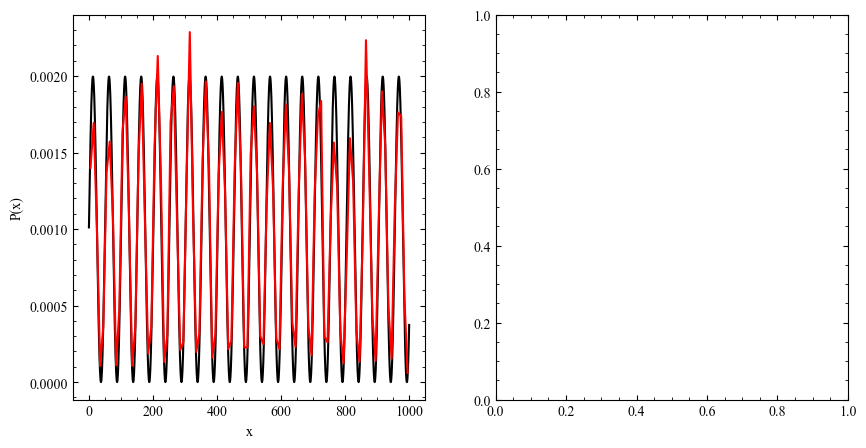

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import emcee

# sample a multi-dimensonal Gaussian 
def prob(x, mu, sig): 
    if (x > 0)&(x<1000): 
        return np.sin((x-mu)/sig) + 1
    else: 
        return -np.inf 
 
def lnprob(x, mu, sig): # emcee actually requires the logarithm of p
    p      = prob(x, mu, sig)
    lnp    = np.log(p)
    if(p == -np.inf): lnp = - np.inf
    return lnp 

mu  = 0; sig = 8
args = (mu, sig)
bins  = np.linspace(0, 1000, 101)
xmean = 0.5*(bins[1:] + bins[:-1])

fig, axs = plt.subplots(1, 2, figsize=(10, 5)); ax = axs[0]
Xrange = np.linspace(0, 1000, 10001)
prob_    = [prob(X, mu, sig) for X in Xrange] 
prob_ = prob_/np.nansum(prob_, where = ~np.isinf(prob_))/(Xrange[1] - Xrange[0])
ax.plot(Xrange, prob_, color='black', label = 'gauss')


ax.set_xlabel('x')
ax.set_ylabel('P(x)')
print(np.nansum(prob_, where = ~np.isinf(prob_) )) 
ndim    = 1; nwalkers= 32
p0      = np.random.rand(nwalkers, ndim) 
p0      = np.random.uniform(0, 1000, size = (nwalkers, ndim) ) 
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args= args)
state   = sampler.run_mcmc(p0, 1000)
samples = sampler.get_chain(flat=True)
print(np.shape(samples))
ax = axs[0] 
h, xedge = np.histogram(samples[:, 0], bins)  
ax.plot(xmean, h/np.sum(h)/(xedge[1] - xedge[0]), color='r', label = 'gauss') 
plt.show()




In [19]:
# np.nansum(prob_[ (~np.isinf(prob_)) ] )
prob_

[-inf,
 1.0124996744817099,
 1.0249973959147123,
 1.0374912115554602,
 1.0499791692706784,
 1.0624593178423802,
 1.0749297072727424,
 1.0873883890887872,
 1.0998334166468282,
 1.1122628454366286,
 1.1246747333852276,
 1.1370671411603854,
 1.1494381324735992,
 1.1617857743826452,
 1.174108137593596,
 1.18640329676227,
 1.1986693307950613,
 1.2109043231491075,
 1.2231063621317455,
 1.235273541199209,
 1.247403959254523,
 1.2594957209445454,
 1.271546936956113,
 1.2835557243112419,
 1.2955202066613396,
 1.3074385145803809,
 1.319308785857001,
 1.331129165785463,
 1.3428978074554514,
 1.3546128720406487,
 1.3662725290860476,
 1.3778749567939563,
 1.3894183423086506,
 1.4009008819996285,
 1.412320781743425,
 1.423676257203938,
 1.4349655341112302,
 1.4461868485387526,
 1.4573384471789554,
 1.4684185876172393,
 1.479425538604203,
 1.4903575803261484,
 1.501213004673798,
 1.5119901155091822,
 1.5226872289306592,
 1.5333026735360202,
 1.5438347906836425,
 1.5542819347516497,
 1.564642473395035